In [1]:
%matplotlib inline
# Import statements and other plot bookkeeping
import numpy as np
from glob import glob
from astropy.io import fits
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math

plt.rc('text', usetex = True) # Use LaTeX font in plots
plt.rcParams['text.latex.preamble'] = [r'\usepackage{gensymb}']
#                                       r'\usepackage{sansmath}',
#                                       r'\sansmath']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  # This is added back by InteractiveShellApp.init_path()


## Measure the read noise in the detector.

In [2]:
## Read noise 

# Import nine 0.1s dark exposures
dark_0p1_files = glob('dark_0.1s/*.fits')
dark_0p1_im = []
for i in range(len(dark_0p1_files)):
    dark_0p1_im.append(fits.getdata(dark_0p1_files[i]))
# fits.getheader(dark_0p1_files[0])
    
dark_0p1_im_arr = np.array(dark_0p1_im)
dark_0p1_im_arr.shape

# Calculate the pixel-wise RMS (standard deviation) of the pixel values
dark_0p1_rms_arr = np.std(dark_0p1_im_arr, axis=0)
dark_0p1_rms_arr.shape

(2532, 3352)

In [3]:
# Look at mean, RMS, and median values of the RMS array
print("Mean value of the RMS array:", np.mean(dark_0p1_rms_arr))
print("Median value of the RMS array:", np.median(dark_0p1_rms_arr))
print("RMS value for the RMS array:", np.std(dark_0p1_rms_arr))
print("Uncertainty on the average read noise:", np.std(dark_0p1_rms_arr)/np.sqrt(2532.*3352.))

Mean value of the RMS array: 25.37624997573225
Median value of the RMS array: 25.077657165072036
RMS value for the RMS array: 6.537680888285881
Uncertainty on the average read noise: 0.0022440878929925337


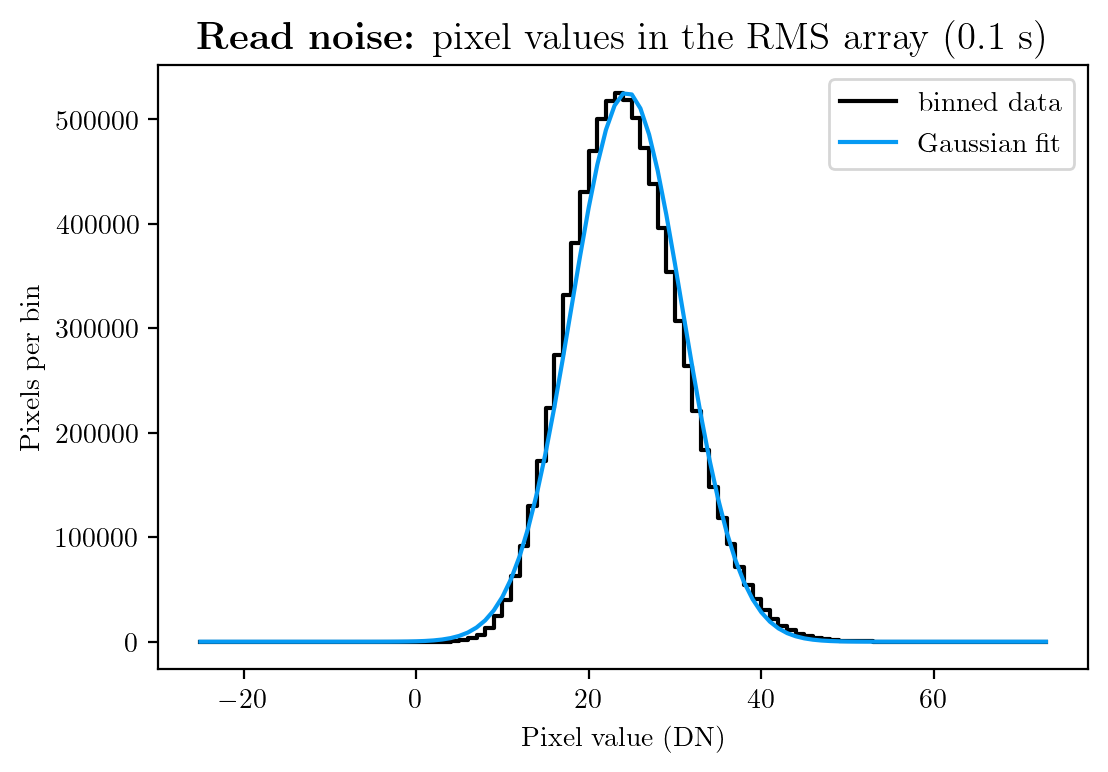

Amplitude, mu, sigma: [5.25919735e+05 2.44263570e+01 6.44317918e+00]
Uncertainty on the average read noise (Gauss): 0.0022116497644201214


In [4]:
# Calculate the same values using a Gaussian fit
counts, bins = np.histogram(dark_0p1_rms_arr.ravel(), bins=np.arange(-25, 75, 1))
def gauss(x, a, mu, sigma):
    return a*np.exp(-.5*(x-mu)**2/(sigma**2))
popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.figure(dpi = 200)
plt.rc('font', family='serif')
plt.step(bins[:-1], counts, color="xkcd:black", label="binned data")
plt.plot(bins[:-1], fit, color="xkcd:azure", label="Gaussian fit")
plt.xlabel("Pixel value (DN)")
plt.ylabel("Pixels per bin")
plt.legend(loc="upper right")
plt.title(r"\textbf{Read noise:} pixel values in the RMS array (0.1 s)", size = 14)
plt.savefig("/Users/alyssabulatek/Desktop/read_noise_0p1s.png", transparent=False)
plt.show()
print("Amplitude, mu, sigma:",popt)
print("Uncertainty on the average read noise (Gauss):",abs(popt[2])/np.sqrt(2532.*3352.))

In [5]:
# Calculate the average read noise, statistical spread, and uncertainty for longer exposures

# Import three 1s dark exposures
dark_1p0_files = glob('dark_1.0s/*.fits')
dark_1p0_im = []
for i in range(len(dark_1p0_files)):
    dark_1p0_im.append(fits.getdata(dark_1p0_files[i]))

dark_1p0_im_arr = np.array(dark_1p0_im)
dark_1p0_im_arr.shape

# Calculate the pixel-wise RMS (standard deviation) of the pixel values
dark_1p0_rms_arr = np.std(dark_1p0_im_arr, axis=0)
dark_1p0_rms_arr.shape

# Look at mean, RMS, and median values of the RMS array
print("Mean value of the RMS array:", np.mean(dark_1p0_rms_arr))
print("Median value of the RMS array:", np.median(dark_1p0_rms_arr))
print("RMS value for the RMS array:", np.std(dark_1p0_rms_arr))
print("Uncertainty on the average read noise:", np.std(dark_1p0_rms_arr)/np.sqrt(2532.*3352.))

print("------------------------")
    
# Import three 10s dark exposures
dark_10p0_files = glob('dark_10.0s/*.fits')
dark_10p0_im = []
for i in range(len(dark_10p0_files)):
    dark_10p0_im.append(fits.getdata(dark_10p0_files[i]))
    
dark_10p0_im_arr = np.array(dark_10p0_im)
dark_10p0_im_arr.shape

# Calculate the pixel-wise RMS (standard deviation) of the pixel values
dark_10p0_rms_arr = np.std(dark_10p0_im_arr, axis=0)
dark_10p0_rms_arr.shape

# Look at mean, RMS, and median values of the RMS array
print("Mean value of the RMS array:", np.mean(dark_10p0_rms_arr))
print("Median value of the RMS array:", np.median(dark_10p0_rms_arr))
print("RMS value for the RMS array:", np.std(dark_10p0_rms_arr))
print("Uncertainty on the average read noise:", np.std(dark_10p0_rms_arr)/np.sqrt(2532.*3352.))

Mean value of the RMS array: 20.060019426246125
Median value of the RMS array: 18.83849486792639
RMS value for the RMS array: 10.54312776769248
Uncertainty on the average read noise: 0.003618975257747009
------------------------
Mean value of the RMS array: 20.18510262118687
Median value of the RMS array: 18.92675942210452
RMS value for the RMS array: 10.634948560888652
Uncertainty on the average read noise: 0.00365049315130246


1456.4295001437208


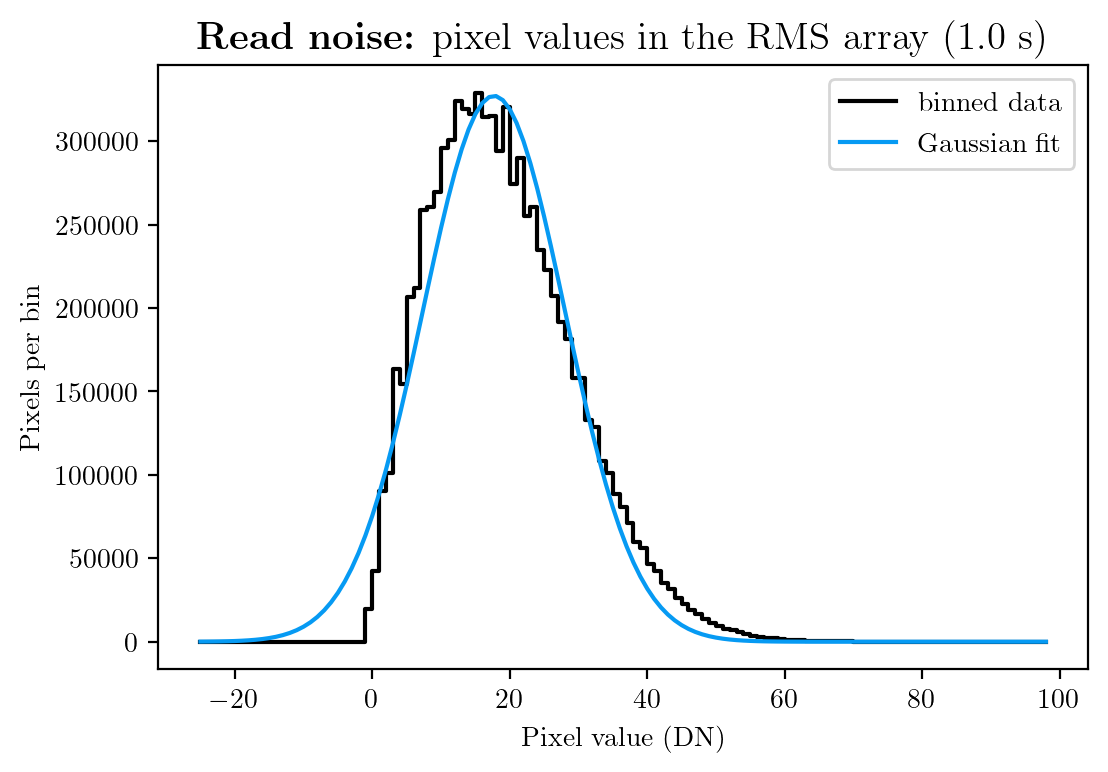

Amplitude, mu, sigma: [3.27128439e+05 1.76934933e+01 1.03320553e+01]
Uncertainty on the average read noise (Gauss): 0.003546523683905515
------------------------


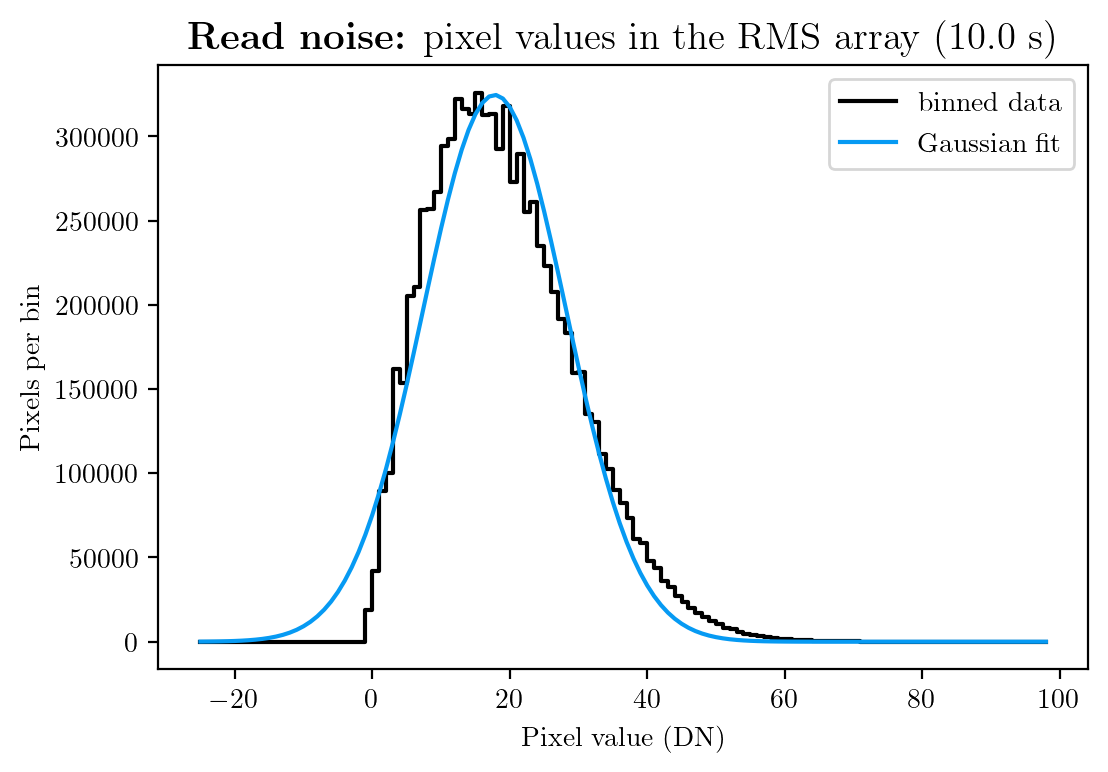

Amplitude, mu, sigma: [3.24640160e+05 1.77949496e+01 1.04103543e+01]
Uncertainty on the average read noise (Gauss): 0.0035734001632996702


In [6]:
# Calculate the same values using a Gaussian fit
print(np.max(dark_1p0_rms_arr.ravel()))
counts, bins = np.histogram(dark_1p0_rms_arr.ravel(), bins=np.arange(-25, 100, 1)) # dunno about bins
def gauss(x, a, mu, sigma):
    return a*np.exp(-.5*(x-mu)**2/(sigma**2))
popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.figure(dpi = 200)
plt.rc('font', family='serif')
plt.step(bins[:-1], counts, color="xkcd:black", label="binned data")
plt.plot(bins[:-1], fit, color="xkcd:azure", label="Gaussian fit")
plt.xlabel("Pixel value (DN)")
plt.ylabel("Pixels per bin")
plt.legend(loc="upper right")
plt.title(r"\textbf{Read noise:} pixel values in the RMS array (1.0 s)", size = 14)
plt.savefig("/Users/alyssabulatek/Desktop/read_noise_1p0s.png", transparent=False)
plt.show()
print("Amplitude, mu, sigma:",popt)
print("Uncertainty on the average read noise (Gauss):",abs(popt[2])/np.sqrt(2532.*3352.))

print("------------------------")

# Calculate the same values using a Gaussian fit
counts, bins = np.histogram(dark_10p0_rms_arr.ravel(), bins=np.arange(-25, 100, 1)) # dunno about bins
def gauss(x, a, mu, sigma):
    return a*np.exp(-.5*(x-mu)**2/(sigma**2))
popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.figure(dpi = 200)
plt.rc('font', family='serif')
plt.step(bins[:-1], counts, color="xkcd:black", label="binned data")
plt.plot(bins[:-1], fit, color="xkcd:azure", label="Gaussian fit")
plt.xlabel("Pixel value (DN)")
plt.ylabel("Pixels per bin")
plt.legend(loc="upper right")
plt.title(r"\textbf{Read noise:} pixel values in the RMS array (10.0 s)", size = 14)
plt.savefig("/Users/alyssabulatek/Desktop/read_noise_10p0s.png", transparent=False)
plt.show()
print("Amplitude, mu, sigma:",popt)
print("Uncertainty on the average read noise (Gauss):",abs(popt[2])/np.sqrt(2532.*3352.))

## Measure the dark current in the detector.

Error bar (uncertainty) values: [0.03165406 0.00991654 0.0134919  0.07253624 0.15158153]
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 0.03677266
    reduced chi-square = 0.01225755
    Akaike info crit   = -20.5621932
    Bayesian info crit = -21.3433174
[[Variables]]
    slope:      0.26616629 +/- 0.00385661 (1.45%) (init = 0.2714224)
    intercept:  1041.87572 +/- 1.71335834 (0.16%) (init = 1039.322)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.927


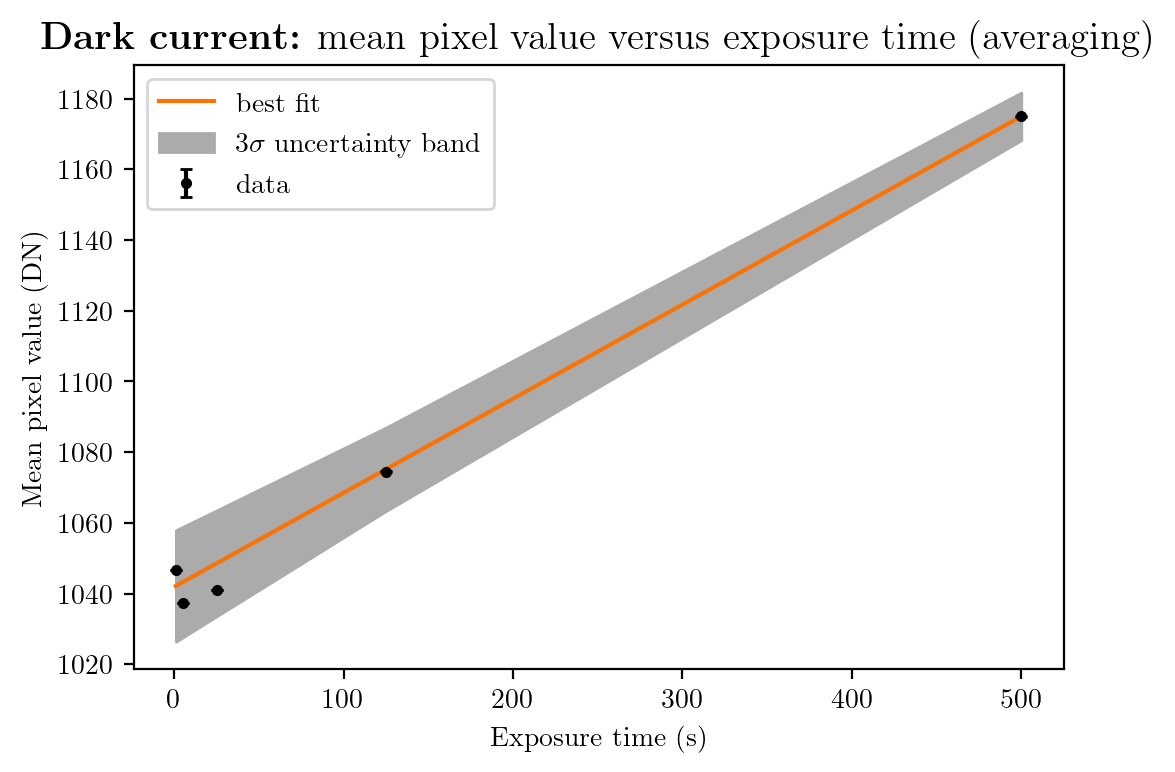

In [7]:
# Calculate the mean and uncertainty of each exposure, then fit a line

# Import five longer dark exposures
dark_longer_files = glob('dark_current/dark_longer/*.fits')
dark_longer_im = []
for i in range(len(dark_longer_files)):
    dark_longer_im.append(fits.getdata(dark_longer_files[i]))
    
dark_longer_im_arr = np.array(dark_longer_im)
dark_longer_im_arr.shape

# For each exposure time, calculate the mean value and uncertainty
I_c_exposure_times = np.array([1.0, 5.0, 25.0, 125.0, 500.0])
I_c_means = []
I_c_uncertainties = []

for frame in dark_longer_im_arr:
    I_c_means.append(np.mean(frame))
    I_c_uncertainties.append(np.std(frame)/np.sqrt(2532.*3352.)) # need to div by sqrt(N_{pix}) to get uncertainty
I_c_means = np.array(I_c_means)
I_c_uncertainties = np.array(I_c_uncertainties)

print("Error bar (uncertainty) values:",I_c_uncertainties)

# Calculate a linear fit for the data <-- not using this method anymore, now using lmfit
# def linear(x, m, b):
#     return m*x + b
# popt, pcov = curve_fit(linear, xdata=I_c_exposure_times, ydata=I_c_means, sigma=I_c_uncertainties, p0=[1,1])
# print("Slope of mean pixel value vs. exposure time (dDN/dt):",popt[0])
# print("Uncertainty on dDN/dt:",np.sqrt(np.diag(pcov))[0])
# plt.plot(I_c_exposure_times, popt[0]*I_c_exposure_times+popt[1], color="xkcd:orange", linestyle="--")

# Calculate a linear fit for the data
from lmfit.models import LinearModel

model = LinearModel()
params = model.guess(I_c_means, x=I_c_exposure_times)
result = model.fit(I_c_means, params, x=I_c_exposure_times, weights=I_c_uncertainties)
print(result.fit_report())

plt.figure(dpi = 200)
plt.rc('font', family='serif')
dely = result.eval_uncertainty(sigma=3)
plt.fill_between(I_c_exposure_times, result.best_fit-dely, result.best_fit+dely, color="#ABABAB",
                 label='3$\sigma$ uncertainty band')
# # https://lmfit.github.io/lmfit-py/model.html#calculating-uncertainties-in-the-model-function
# result.plot_fit(yerr = I_c_uncertainties, datafmt='.k', fitfmt='xkcd:orange')
plt.plot(I_c_exposure_times, result.best_fit, color="xkcd:orange", label="best fit")
plt.errorbar(I_c_exposure_times, I_c_means, yerr=I_c_uncertainties, fmt='.', capsize=2, color="xkcd:black", 
             label="data")
plt.xlabel("Exposure time (s)")
plt.ylabel("Mean pixel value (DN)")
plt.title(r"\textbf{Dark current:} mean pixel value versus exposure time (averaging)", size = 14)
plt.legend(loc="upper left")
plt.savefig("/Users/alyssabulatek/Desktop/dark_current_averaging.png", transparent=False)
plt.show()

# Try to plot the residuals -- might not be necessary if I have chi-sq of fit, uncertainty on slope parameter
# plt.figure(dpi = 200)
# plt.rc('font', family='serif')
# # plt.errorbar(I_c_exposure_times, result.residual, fmt='.', capsize=2, color="xkcd:black")
# result.plot_residuals(yerr=I_c_uncertainties)
# plt.show()

In [8]:
# Calculate dDN/dt using the Gaussian fitting method
# I could have written a function for this
I_c_means_gauss = []
I_c_uncertainties_gauss = []
for frame in dark_longer_im_arr:
    counts, bins = np.histogram(frame.ravel(), bins=66000, range=(0,66000))
    popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,np.mean(frame.ravel()),50])
    fit = gauss(bins[:-1], *popt)
#     plt.figure(dpi = 100)
#     plt.rc('font', family='serif')
#     plt.step(bins[:-1], counts)
#     plt.plot(bins[:-1], fit)
#     plt.xlim(popt[1]-5*popt[2],popt[1]+5*popt[2])
    I_c_means_gauss.append(popt[1])
    I_c_uncertainties_gauss.append(popt[2]/np.sqrt(2532.*3352.))
I_c_means_gauss = np.array(I_c_means_gauss)
I_c_uncertainties_gauss = np.array(I_c_uncertainties_gauss)

print("Error bar (uncertainty) values:",I_c_uncertainties_gauss)

Error bar (uncertainty) values: [0.00975597 0.00963953 0.00966576 0.01031171 0.01175872]


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 0.00670889
    reduced chi-square = 0.00223630
    Akaike info crit   = -29.0688018
    Bayesian info crit = -29.8499260
[[Variables]]
    slope:      0.24577432 +/- 0.00997996 (4.06%) (init = 0.2458713)
    intercept:  1038.74075 +/- 2.62103325 (0.25%) (init = 1038.678)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.617


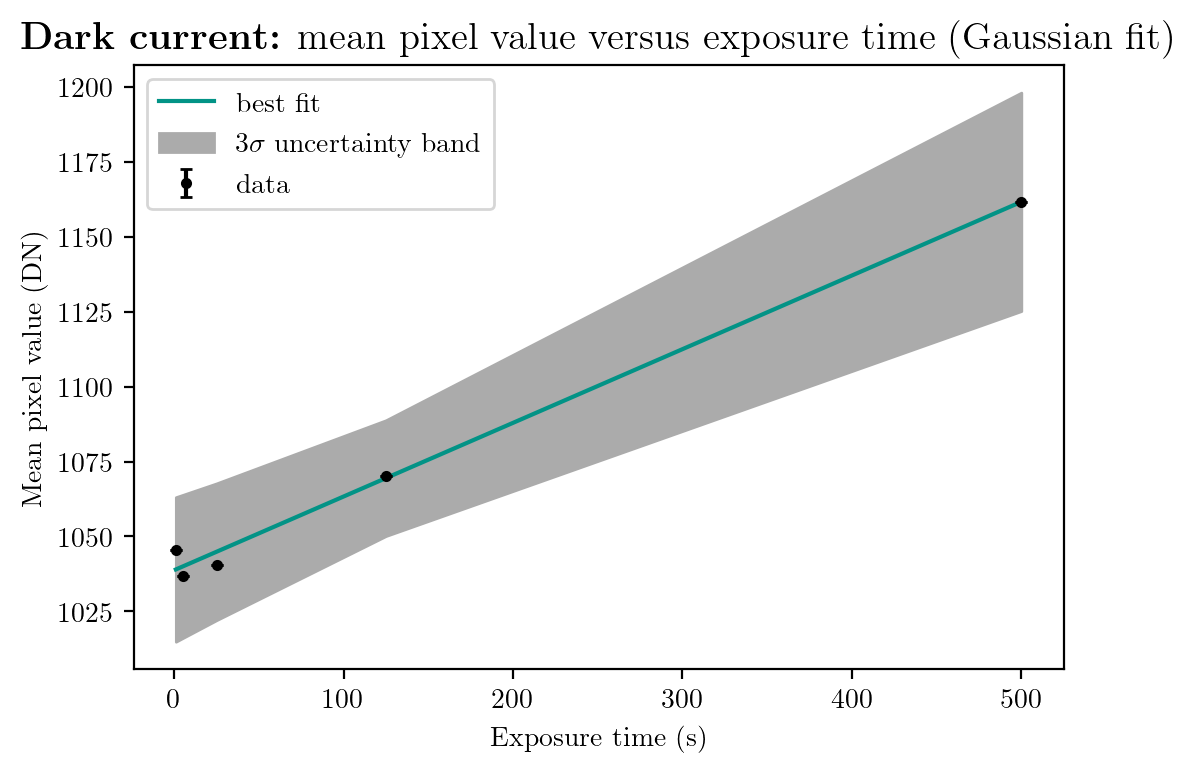

In [9]:
# Calculate a linear fit for the Gaussian fitted data <-- not using this method
# popt, pcov = curve_fit(linear, xdata=I_c_exposure_times, ydata=I_c_means_gauss, sigma=I_c_uncertainties_gauss, p0=[1,1])
# plt.errorbar(I_c_exposure_times, I_c_means_gauss, yerr=I_c_uncertainties_gauss, fmt='.', capsize=2, color="xkcd:black")
# plt.plot(I_c_exposure_times, popt[0]*I_c_exposure_times+popt[1], color="xkcd:teal", linestyle="--")
# plt.xlabel("Exposure time (s)")
# plt.ylabel("Mean pixel value (DNs)")
# plt.title(r"\textbf{Dark current:} mean pixel value versus exposure time (Gaussian fit)", size = 14)
# plt.savefig("/Users/alyssabulatek/Desktop/dark_current_gauss.png", transparent=False)
# plt.show()
# print("Slope of mean pixel value versus exposure time (dDN/dt):",popt[0])
# print("Uncertainty on dDN/dt:",np.sqrt(np.diag(pcov))[0])

# Calculate a linear fit for the Gaussian fitted data
from lmfit.models import LinearModel

model = LinearModel()
params = model.guess(I_c_means_gauss, x=I_c_exposure_times)
result = model.fit(I_c_means_gauss, params, x=I_c_exposure_times, weights=I_c_uncertainties_gauss)
print(result.fit_report())

plt.figure(dpi = 200)
plt.rc('font', family='serif')
dely = result.eval_uncertainty(sigma=3)
plt.fill_between(I_c_exposure_times, result.best_fit-dely, result.best_fit+dely, color="#ABABAB",
                 label='3$\sigma$ uncertainty band')
# # https://lmfit.github.io/lmfit-py/model.html#calculating-uncertainties-in-the-model-function
# result.plot_fit(yerr = I_c_uncertainties, datafmt='.k', fitfmt='xkcd:orange')
plt.plot(I_c_exposure_times, result.best_fit, color="xkcd:teal", label="best fit")
plt.errorbar(I_c_exposure_times, I_c_means_gauss, yerr=I_c_uncertainties_gauss, fmt='.', capsize=2, 
             color="xkcd:black", label="data")
plt.xlabel("Exposure time (s)")
plt.ylabel("Mean pixel value (DN)")
plt.title(r"\textbf{Dark current:} mean pixel value versus exposure time (Gaussian fit)", size = 14)
plt.legend(loc="upper left")
plt.savefig("/Users/alyssabulatek/Desktop/dark_current_gauss.png", transparent=False)
plt.show()

## Measure the gain of the detector.

In [10]:
# Measure the gain using Group 4's data

# Import three (or four, for 1.0s and 75.0s) images at each exposure time
gain_0p1_files = glob('gain/gain_0.1s/*.fits')
gain_0p1_im = []
for i in range(len(gain_0p1_files)):
    gain_0p1_im.append(fits.getdata(gain_0p1_files[i]))
    
gain_0p1_im_arr = np.array(gain_0p1_im)
gain_0p1_im_arr.shape

########

gain_1p0_files = glob('gain/gain_1.0s/*.fits')
gain_1p0_im = []
for i in range(len(gain_1p0_files)):
    gain_1p0_im.append(fits.getdata(gain_1p0_files[i]))
    
gain_1p0_im_arr = np.array(gain_1p0_im)
gain_1p0_im_arr.shape

########

gain_5p0_files = glob('gain/gain_5.0s/*.fits')
gain_5p0_im = []
for i in range(len(gain_5p0_files)):
    gain_5p0_im.append(fits.getdata(gain_5p0_files[i]))
    
gain_5p0_im_arr = np.array(gain_5p0_im)
gain_5p0_im_arr.shape

########

gain_15p0_files = glob('gain/gain_15.0s/*.fits')
gain_15p0_im = []
for i in range(len(gain_15p0_files)):
    gain_15p0_im.append(fits.getdata(gain_15p0_files[i]))
    
gain_15p0_im_arr = np.array(gain_15p0_im)
gain_15p0_im_arr.shape

########

gain_25p0_files = glob('gain/gain_25.0s/*.fits')
gain_25p0_im = []
for i in range(len(gain_25p0_files)):
    gain_25p0_im.append(fits.getdata(gain_25p0_files[i]))
    
gain_25p0_im_arr = np.array(gain_25p0_im)
gain_25p0_im_arr.shape

########

gain_50p0_files = glob('gain/gain_50.0s/*.fits')
gain_50p0_im = []
for i in range(len(gain_50p0_files)):
    gain_50p0_im.append(fits.getdata(gain_50p0_files[i]))
    
gain_50p0_im_arr = np.array(gain_50p0_im)
gain_50p0_im_arr.shape

########

gain_75p0_files = glob('gain/gain_75.0s/*.fits')
gain_75p0_im = []
for i in range(len(gain_75p0_files)):
    gain_75p0_im.append(fits.getdata(gain_75p0_files[i]))
    
gain_75p0_im_arr = np.array(gain_75p0_im)
gain_75p0_im_arr.shape

########

gain_100p0_files = glob('gain/gain_100.0s/*.fits')
gain_100p0_im = []
for i in range(len(gain_100p0_files)):
    gain_100p0_im.append(fits.getdata(gain_100p0_files[i]))
    
gain_100p0_im_arr = np.array(gain_100p0_im)
gain_100p0_im_arr.shape

(3, 2532, 3352)

In [11]:
# Calculate the pixel-wise mean of the pixel values
gain_0p1_mean_arr = np.mean(gain_0p1_im_arr, axis=0)
gain_1p0_mean_arr = np.mean(gain_1p0_im_arr, axis=0)
gain_5p0_mean_arr = np.mean(gain_5p0_im_arr, axis=0)
gain_15p0_mean_arr = np.mean(gain_15p0_im_arr, axis=0)
gain_25p0_mean_arr = np.mean(gain_25p0_im_arr, axis=0)
gain_50p0_mean_arr = np.mean(gain_50p0_im_arr, axis=0)
gain_75p0_mean_arr = np.mean(gain_75p0_im_arr, axis=0)
gain_100p0_mean_arr = np.mean(gain_100p0_im_arr, axis=0)

# Calculate the pixel-wise RMS (standard deviation) of the pixel values
gain_0p1_rms_arr = np.std(gain_0p1_im_arr, axis=0)
gain_1p0_rms_arr = np.std(gain_1p0_im_arr, axis=0)
gain_5p0_rms_arr = np.std(gain_5p0_im_arr, axis=0)
gain_15p0_rms_arr = np.std(gain_15p0_im_arr, axis=0)
gain_25p0_rms_arr = np.std(gain_25p0_im_arr, axis=0)
gain_50p0_rms_arr = np.std(gain_50p0_im_arr, axis=0)
gain_75p0_rms_arr = np.std(gain_75p0_im_arr, axis=0)
gain_100p0_rms_arr = np.std(gain_100p0_im_arr, axis=0)

# Calculate the pixel-wise variance (square of the standard deviation) of the pixel values
gain_0p1_var_arr = gain_0p1_rms_arr**2
gain_1p0_var_arr = gain_1p0_rms_arr**2
gain_5p0_var_arr = gain_5p0_rms_arr**2
gain_15p0_var_arr = gain_15p0_rms_arr**2
gain_25p0_var_arr = gain_25p0_rms_arr**2
gain_50p0_var_arr = gain_50p0_rms_arr**2
gain_75p0_var_arr = gain_75p0_rms_arr**2
gain_100p0_var_arr = gain_100p0_rms_arr**2

In [12]:
# Calculate the signal values given the eight data points we have, excluding 50.0s exposure time
signal = np.array([np.median(gain_0p1_mean_arr),
    np.median(gain_1p0_mean_arr), 
    np.median(gain_5p0_mean_arr), 
    np.median(gain_15p0_mean_arr), 
    np.median(gain_25p0_mean_arr),
    np.median(gain_75p0_mean_arr), 
    np.median(gain_100p0_mean_arr)])

signal_sigma = np.array([np.std(gain_0p1_mean_arr),
    np.std(gain_1p0_mean_arr), 
    np.std(gain_5p0_mean_arr), 
    np.std(gain_15p0_mean_arr), 
    np.std(gain_25p0_mean_arr),
    np.std(gain_75p0_mean_arr), 
    np.std(gain_100p0_mean_arr)])

signal_uncertainty = signal_sigma/np.sqrt(2532.*3352.)

variance = np.array([np.median(gain_0p1_var_arr),
    np.median(gain_1p0_var_arr),
    np.median(gain_5p0_var_arr),
    np.median(gain_15p0_var_arr), 
    np.median(gain_25p0_var_arr),
    np.median(gain_75p0_var_arr), 
    np.median(gain_100p0_var_arr)])

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 2.3769e+08
    reduced chi-square = 47537374.2
    Akaike info crit   = 125.383882
    Bayesian info crit = 125.275702
[[Variables]]
    slope:      2.19921004 +/- 0.16872236 (7.67%) (init = 2.19921)
    intercept: -4114.14511 +/- 3524.54114 (85.67%) (init = -4114.145)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.673


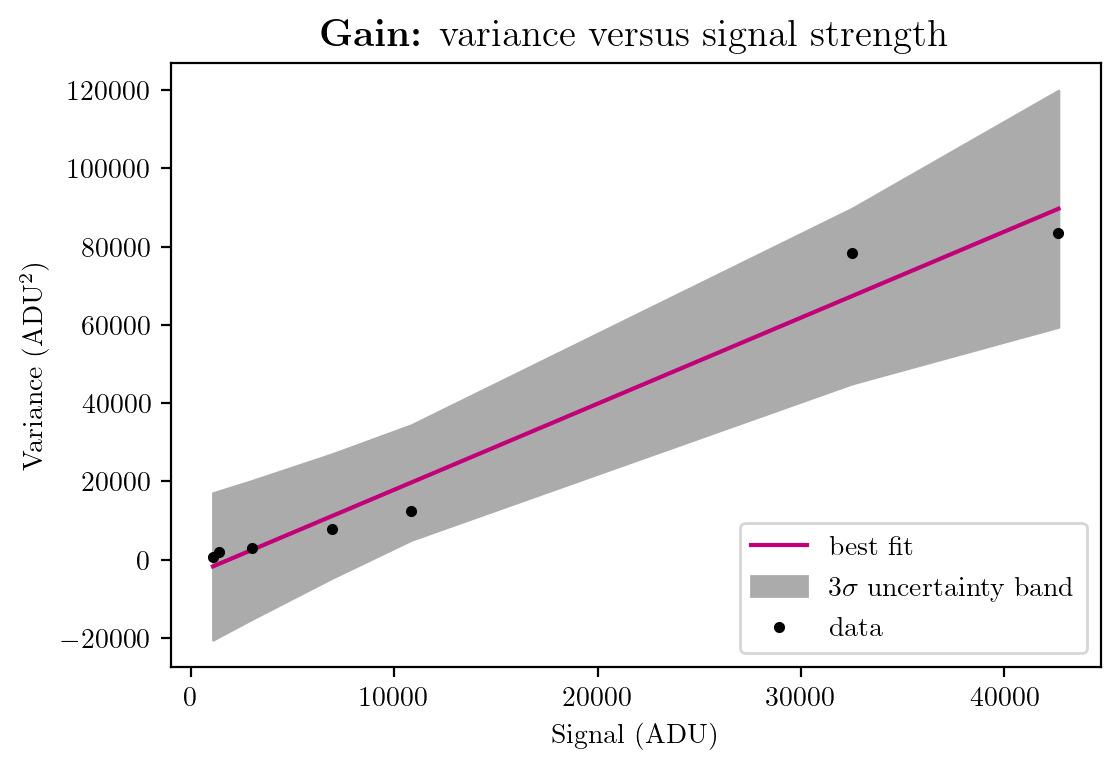

In [13]:
# Calculate a linear fit for the gain data
# popt, pcov = curve_fit(linear, xdata=signal, ydata=variance, sigma=signal_sigma, p0=[1,-1000])
# print("Gain value in ADU per electron:",popt[0])
# print("Uncertainty on gain value in ADU per electron:",np.sqrt(np.diag(pcov))[0])
# print("Gain value in electrons per ADU:",1./popt[0])
from lmfit.models import LinearModel

model = LinearModel()
params = model.guess(variance, x=signal)
result = model.fit(variance, params, x=signal)
print(result.fit_report())

plt.figure(dpi = 200)
plt.rc('font', family='serif')
dely = result.eval_uncertainty(sigma=3)
plt.fill_between(signal, result.best_fit-dely, result.best_fit+dely, color="#ABABAB",
                 label='3$\sigma$ uncertainty band')
# # https://lmfit.github.io/lmfit-py/model.html#calculating-uncertainties-in-the-model-function
plt.plot(signal, result.best_fit, color="xkcd:magenta", label="best fit")
plt.errorbar(signal, variance, fmt='.', capsize=2, 
             color="xkcd:black", label="data")
plt.xlabel("Signal (ADU)")
plt.ylabel(r"Variance (ADU\textsuperscript{2})")
plt.title(r"\textbf{Gain:} variance versus signal strength", size = 14)
plt.legend(loc="lower right")
plt.savefig("/Users/alyssabulatek/Desktop/gain.png", transparent=False)
plt.show()

In [14]:
# Trying something different

# huh... i can't get this to plot anything that looks even vaguely like a line. 

# sa1 = np.ravel(gain_0p1_mean_arr)
# sa2 = np.ravel(gain_1p0_mean_arr)
# sa3 = np.ravel(gain_5p0_mean_arr)
# sa4 = np.ravel(gain_15p0_mean_arr)
# sa5 = np.ravel(gain_25p0_mean_arr)
# sa6 = np.ravel(gain_50p0_mean_arr)
# sa7 = np.ravel(gain_75p0_mean_arr)
# sa8 = np.ravel(gain_100p0_mean_arr)

# va1 = np.ravel(gain_0p1_var_arr)
# va2 = np.ravel(gain_1p0_var_arr)
# va3 = np.ravel(gain_5p0_var_arr)
# va4 = np.ravel(gain_15p0_var_arr)
# va5 = np.ravel(gain_25p0_var_arr)
# va6 = np.ravel(gain_50p0_var_arr)
# va7 = np.ravel(gain_75p0_var_arr)
# va8 = np.ravel(gain_100p0_var_arr)

# sig_arrays = np.concatenate((sa1, sa2, sa3, sa4, sa5, sa6, sa7, sa8))
# s_arg = sig_arrays.argsort()
# var_arrays = np.concatenate((va1, va2, va3, va4, va5, va6, va7, va8))
# signal_sorted_matched = sig_arrays[s_arg]
# variance_sorted_matched = var_arrays[s_arg]

# bins = np.arange(np.min(sig_arrays), np.max(sig_arrays), 1)
# digitized = np.digitize(var_arrays, bins)
# bin_means = [var_arrays[digitized == i].mean() for i in range(1, len(bins))]

# plt.figure(dpi = 200)
# plt.rc('font', family='serif')
# plt.scatter(gain_0p1_mean_arr.ravel(), gain_0p1_var_arr.ravel())
# plt.scatter(gain_1p0_mean_arr.ravel(), gain_1p0_var_arr.ravel())
# plt.scatter(gain_5p0_mean_arr.ravel(), gain_5p0_var_arr.ravel())
# plt.scatter(gain_15p0_mean_arr.ravel(), gain_15p0_var_arr.ravel())
# plt.scatter(gain_25p0_mean_arr.ravel(), gain_25p0_var_arr.ravel())
# plt.scatter(gain_50p0_mean_arr.ravel(), gain_50p0_var_arr.ravel())
# plt.scatter(gain_75p0_mean_arr.ravel(), gain_75p0_var_arr.ravel())
# plt.scatter(gain_100p0_mean_arr.ravel(), gain_100p0_var_arr.ravel())
# # plt.plot(signal, popt[0]*signal+popt[1], color="xkcd:magenta", linestyle="--")
# plt.xlabel("Signal (ADU)")
# plt.ylabel(r"Variance (ADU\textsuperscript{2})")
# plt.title(r"\textbf{Gain:} variance versus signal strength (trying something)", size = 14)
# plt.show()

In [15]:
# from scipy.stats import binned_statistic

# bin_means, bin_edges, binnumber = binned_statistic(variance_sorted_matched, 
#                                                      signal_sorted_matched, 
#                                                      statistic='mean', bins=65000)

# # this also doesn't look linear. i feel kinda stupid, i don't super understand how this binning should help
# # with the issue of there not being enough data points when we average over each exptime

# bin_width = (bin_edges[1] - bin_edges[0])
# bin_centers = bin_edges[1:] - bin_width/2

# plt.figure(dpi = 200)
# plt.scatter(bin_centers, bin_means)
# plt.show()

## Measure the linearity of the detector.

In [16]:
# Measure the linearity

# Import high light level data
linearity_amb_files = ["lin_amb_1.0s.2020-10-01T20_56_21.068.0114.fits",
    "lin_amb_3.0s.2020-10-01T20_57_02.485.0115.fits",
    "lin_amb_10.0s.2020-10-01T20_57_32.847.0116.fits",
    "lin_amb_30.0s.2020-10-01T20_58_28.275.0117.fits",
    "lin_amb_60.0s.2020-10-01T21_00_07.758.0118.fits",
    "lin_amb_120.0s.2020-10-01T21_02_32.603.0119.fits",
    "lin_amb_180.0s.2020-10-01T21_05_44.247.0120.fits"] # Can't use glob because it doesn't preserve the order
linearity_amb_im = []
for i in range(len(linearity_amb_files)):
    linearity_amb_im.append(fits.getdata("linearity/amb/"+linearity_amb_files[i]))
    
linearity_amb_im_arr = np.array(linearity_amb_im)
linearity_amb_im_arr.shape

# Import low light level data
linearity_dim_files = ["lin_dim_1.0s.2020-10-01T20_33_59.490.0105.fits",
    "lin_dim_3.0s.2020-10-01T20_34_22.880.0106.fits",
    "lin_dim_10.0s.2020-10-01T20_34_47.271.0107.fits",
    "lin_dim_30.0s.2020-10-01T20_35_32.677.0108.fits",
    "lin_dim_60.0s.2020-10-01T20_36_52.137.0109.fits",
    "lin_dim_120.0s.2020-10-01T20_39_19.673.0110.fits",
    "lin_dim_180.0s.2020-10-01T20_43_09.299.0111.fits",
    "lin_dim_240.0s.2020-10-01T20_47_53.197.0112.fits",
    "lin_dim_300.0s.2020-10-01T20_53_28.980.0113.fits"] # Can't use glob because it doesn't preserve the order
linearity_dim_im = []
for i in range(len(linearity_dim_files)):
    linearity_dim_im.append(fits.getdata("linearity/dim/"+linearity_dim_files[i]))
    
linearity_dim_im_arr = np.array(linearity_dim_im)
linearity_dim_im_arr.shape

# Calculate reported DN for each exposure time
DN_amb = []
DN_dim = []

for frame in linearity_amb_im_arr:
    DN_amb.append(np.median(frame.ravel()))

for frame in linearity_dim_im_arr:
    DN_dim.append(np.median(frame.ravel()))

DN_amb = np.array(DN_amb)
DN_dim = np.array(DN_dim)

# Plot reported DN as a function of exposure time
exp_times_amb = np.array([1.0, 3.0, 10.0, 30.0, 60.0, 120.0, 180.0])
exp_times_dim = np.array([1.0, 3.0, 10.0, 30.0, 60.0, 120.0, 180.0, 240.0, 300.0])

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 70733247.1
    reduced chi-square = 14146649.4
    Akaike info crit   = 116.899613
    Bayesian info crit = 116.791433
[[Variables]]
    slope:      375.644894 +/- 22.4400806 (5.97%) (init = 375.6449)
    intercept:  2706.92326 +/- 1923.08817 (71.04%) (init = 2706.923)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.673
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 2.3769e+08
    reduced chi-square = 47537374.2
    Akaike info crit   = 125.383882
    Bayesian info crit = 125.275702
[[Variables]]
    slope:      2.19921004 +/- 0.16872236 (7.67%) (init = 2.19921)
    intercept: -4114.14511 +/- 3524.54114 (85.67%) (init = -4114.145)


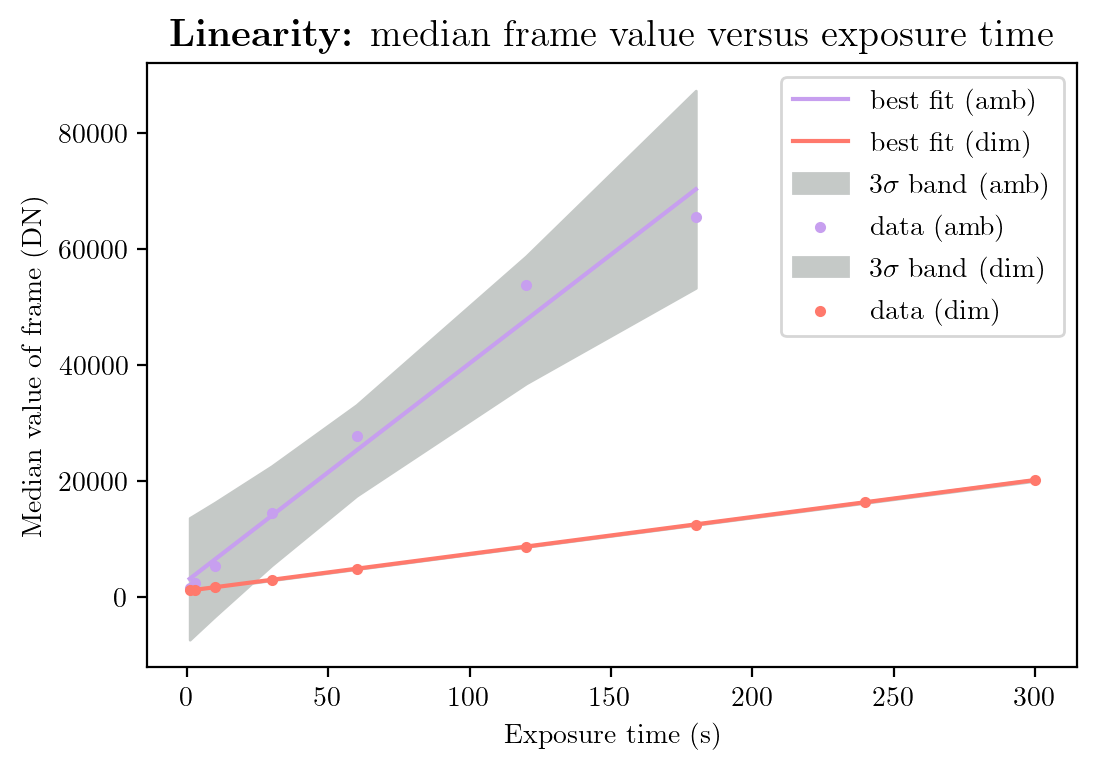

In [17]:
# popt_amb, pcov_amb = curve_fit(linear, xdata=exp_times_amb, ydata=DN_amb, p0=[1,0])
# popt_dim, pcov_dim = curve_fit(linear, xdata=exp_times_dim, ydata=DN_dim, p0=[1,0])
from lmfit.models import LinearModel

model = LinearModel()
params1 = model.guess(DN_amb, x=exp_times_amb)
result1 = model.fit(DN_amb, params1, x=exp_times_amb)
print(result1.fit_report())

plt.figure(dpi = 200)
plt.rc('font', family='serif')
dely = result1.eval_uncertainty(sigma=3)
plt.fill_between(exp_times_amb, result1.best_fit-dely, result1.best_fit+dely, color="xkcd:silver",
                 label='3$\sigma$ band (amb)')
# # https://lmfit.github.io/lmfit-py/model.html#calculating-uncertainties-in-the-model-function
plt.plot(exp_times_amb, result1.best_fit, color="xkcd:lavender", label="best fit (amb)")
plt.scatter(exp_times_amb, DN_amb, marker='.', color="xkcd:lavender", label="data (amb)")

model = LinearModel()
params2 = model.guess(DN_dim, x=exp_times_dim)
result2 = model.fit(DN_dim, params2, x=exp_times_dim)
print(result.fit_report())

plt.rc('font', family='serif')
dely = result2.eval_uncertainty(sigma=3)
plt.fill_between(exp_times_dim, result2.best_fit-dely, result2.best_fit+dely, color="xkcd:silver",
                 label='3$\sigma$ band (dim)')
# # https://lmfit.github.io/lmfit-py/model.html#calculating-uncertainties-in-the-model-function
plt.plot(exp_times_dim, result2.best_fit, color="xkcd:salmon", label="best fit (dim)")
plt.scatter(exp_times_dim, DN_dim, marker='.', color="xkcd:salmon", label="data (dim)")

plt.xlabel("Exposure time (s)")
plt.ylabel("Median value of frame (DN)")
plt.title(r"\textbf{Linearity:} median frame value versus exposure time", size = 14)
plt.legend(loc="upper right")
plt.savefig("/Users/alyssabulatek/Desktop/linearity.png", transparent=False)
plt.show()

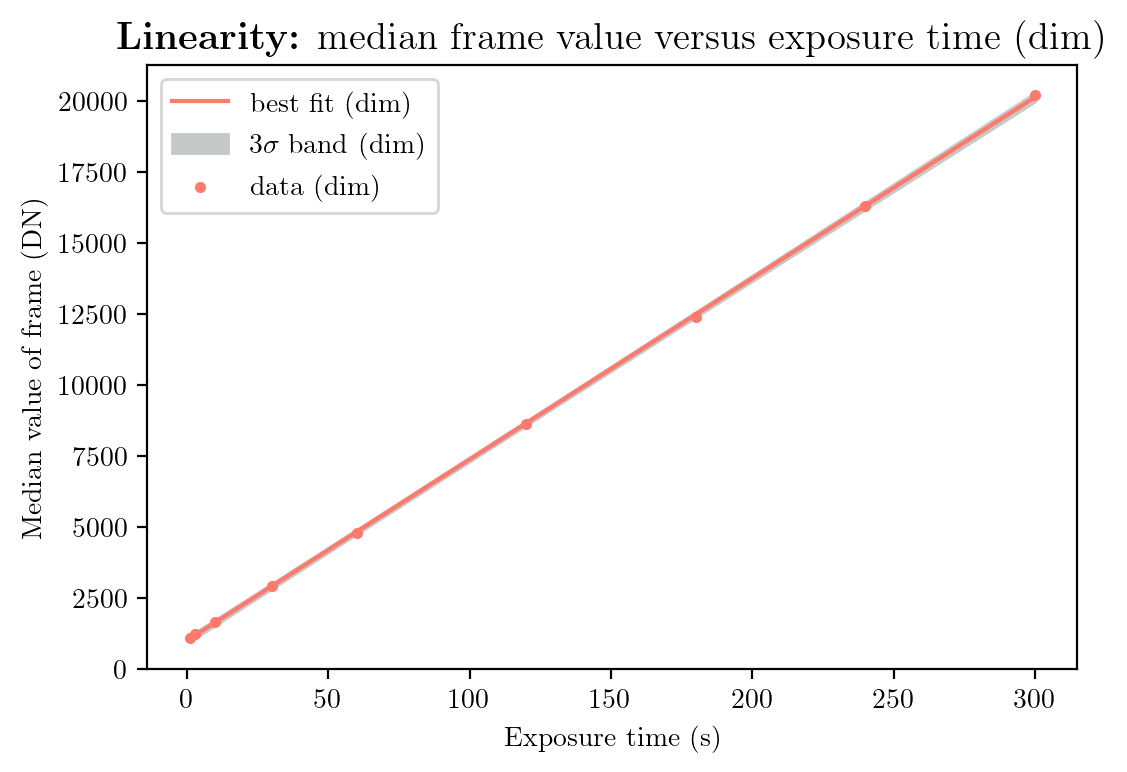

In [21]:
plt.figure(dpi = 200)

plt.rc('font', family='serif')
dely = result2.eval_uncertainty(sigma=3)
plt.fill_between(exp_times_dim, result2.best_fit-dely, result2.best_fit+dely, color="xkcd:silver",
                 label='3$\sigma$ band (dim)')
# # https://lmfit.github.io/lmfit-py/model.html#calculating-uncertainties-in-the-model-function
plt.plot(exp_times_dim, result2.best_fit, color="xkcd:salmon", label="best fit (dim)")
plt.scatter(exp_times_dim, DN_dim, marker='.', color="xkcd:salmon", label="data (dim)")

plt.xlabel("Exposure time (s)")
plt.ylabel("Median value of frame (DN)")
plt.title(r"\textbf{Linearity:} median frame value versus exposure time (dim)", size = 14)
plt.legend(loc="upper left")
plt.savefig("/Users/alyssabulatek/Desktop/linearity_dim.png", transparent=False)
plt.show()